<hr>

### IMPORTAÇÕES

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from scipy.spatial.distance import cdist

> <hr>

### DATASET

> Permanece o mesmo por enquanto;

In [21]:
# substituindo 'caminho/do/seu/iris.data' pelo caminho real do seu arquivo Iris.data e 'iris.csv' pelo nome desejado para o arquivo CSV de saída.
input_file = 'C:\\JupyterLab\\PAPL-UFPE\\ML-Fuzzy\\Testes\\iris.data'
output_file = 'iris.csv'

# carregando arquivo no pandas
iris_data = pd.read_csv(input_file, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# salvando em comma separated values (csv)
iris_data.to_csv(output_file, index=False)

In [22]:
# normalização
for index in iris_data.columns: # em suma, para as colunas do DataFrame, vamos analisar se os dados são numéricos
    # se os dados forem numéricos, eles serão normalizados
    if is_numeric_dtype(iris_data[index][0]): # retomando uma função do pandas
        iris_data[index] = iris_data[index]/max(iris_data[index])

In [23]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.645570,0.795455,0.202899,0.08,Iris-setosa
1,0.620253,0.681818,0.202899,0.08,Iris-setosa
2,0.594937,0.727273,0.188406,0.08,Iris-setosa
3,0.582278,0.704545,0.217391,0.08,Iris-setosa
4,0.632911,0.818182,0.202899,0.08,Iris-setosa


**ANALISANDO A DISTRIBUIÇÃO DOS DADOS**

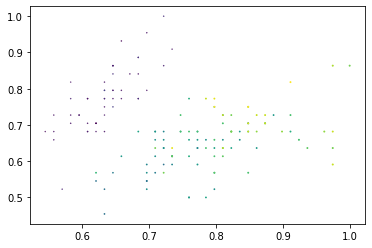

In [24]:
# todos os dados
data=iris_data.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
plt.scatter(data.sepal_length, data.sepal_width, data.petal_length, data.petal_width)

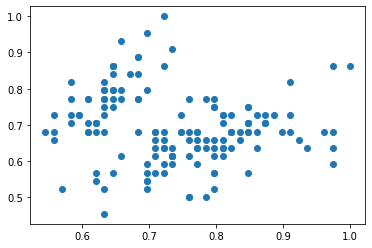

In [25]:
# data only according to sepal
data=iris_data.loc[:,['sepal_length', 'sepal_width']]
plt.scatter(data.sepal_length, data.sepal_width)

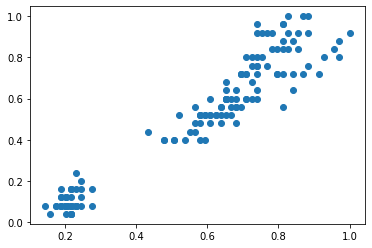

In [26]:
# data accoording only to petal
data=iris_data.loc[:,['petal_length', 'petal_width']]
plt.scatter(data.petal_length, data.petal_width)

> <hr>

### Observações Implementação

In [27]:
# pois um lance que percebi é que deixei o kernel trick com deus, não implementei ele
# daí, como ele parece um boa estretégia principalmente pra dados menos controlados como o do iris, vou tentar colocar aqui
# fiz um notebook só pra isso pq se der problema demais pelo menos não atrapalha o que já tá encaminhado
# vi que tem opções diferentes de implementar ele, daí vamo seguir o esquema do artigo, se possível
    # "In kernel-based clustering algorithms it is possible to compute Euclidean distances by using kernel functions and the so-called distance kernel trick."
    # This trick uses a kernel function to calculate the dot products of vectors implicitly in the higher dimensional space using the original space."
    # artigo prof
# a fórmula implementada aqui é a do artigo mesmo

# além do kernel trick faltou tb lagrane

# bora por partes > COISAS PARA RESOLVER:
    # 1. Kernel trick + largura = FEITO
    # 2. Lagrange (entender onde entra e colocar) = FAZENDO

### FUZZY C-MEANS

In [28]:
iris_data = np.array(iris_data)
iris_data # shoukd be a 2d array

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08,
        'Iris-setosa'],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08, 'Iris-setosa'],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16, 'Iris-setosa'],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12, 'Iris-setosa'],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04,
        'Iris-setosa'],
       [0.68

In [29]:
iris_data_without_last_column = iris_data[:, :-1]
iris_data_without_last_column

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04],
       [0.6835443037974683, 0.8409090909090908, 0.21739130434782608,
        0.08],
       [0.6075949367088607, 0.7727272727272726, 0.2318840579710145, 0.08],
       [0.607594936

**CONDIÇÕES INICIAIS**

> Acho que aqui vai caber definir algumas coisas como funções e não mais como valores fixos

In [30]:
# number of clusters
    # definido como 3 pq conheço o iris dataset
K = 3

# fuzziness value 
m = [1.1, 1.6, 2]
# os valores definidos acima foram indicados pelo professor

#gama = 

# seria a taxa de aprendizado?
#epsilon = 

In [31]:
# parâmetro de largura = sigma = s
# para calcular o parâmetro de largura agora entra lagrange na verdade
# cálculo com base na função do artigo que o professor mostrou
    # to meio que honestamente confusa comigo mesma
def param_largura(iris_data_without_last_column):
    n = iris_data_without_last_column.shape[0] # o mesmo que aquele N de baixo
    total = 0

    # soma pra todos os pares de distância
        # to ficando meio que bem confusa aqui
    for i in range(n):
        for j in range(n):
            total += np.linalg.norm(iris_data_without_last_column[i] - iris_data_without_last_column[j])**2

    # média e raiz
        # eu lembro que conferi e fiquei "ah beleza a raiz tá aqui" MAS DE ONDE EU TIREI ESSA RAIZ meu pai
    s = np.sqrt(total / (2 * n**2))
    return s


# x = 1/(s)**2

s = param_largura(iris_data_without_last_column)
print("Valor de s:", s)

Valor de s: 0.4219931232129643


In [32]:
# definir um início randomico p U
U = np.random.rand(iris_data_without_last_column.shape[0], K)
print('Membership Inicial (U inicial)')
print(U)

Membership Inicial (U inicial)
[[0.55389195 0.3698482  0.22101713]
 [0.14150143 0.28590236 0.06812225]
 [0.58051329 0.50375761 0.98418475]
 [0.38167235 0.40570648 0.41041393]
 [0.46638867 0.02656616 0.24642857]
 [0.30753994 0.89233759 0.50372924]
 [0.61231487 0.04811051 0.18813941]
 [0.53649376 0.9777219  0.39752683]
 [0.4251989  0.34875545 0.06020226]
 [0.81298465 0.53768408 0.55895715]
 [0.45083417 0.62052663 0.01123746]
 [0.77235971 0.81661195 0.99215549]
 [0.69261005 0.37913733 0.20355283]
 [0.12949083 0.6821915  0.05498117]
 [0.06518471 0.37102951 0.1057265 ]
 [0.61098549 0.59741913 0.90691917]
 [0.07607756 0.17930965 0.96307444]
 [0.36216464 0.89961296 0.44429238]
 [0.81238583 0.61142584 0.08046859]
 [0.77054784 0.63014737 0.67430486]
 [0.88658505 0.803332   0.58360695]
 [0.12763168 0.07102081 0.39315682]
 [0.08971224 0.08503124 0.95586771]
 [0.92242793 0.58494594 0.07703537]
 [0.20172589 0.13768401 0.15035054]
 [0.916498   0.49205753 0.41615005]
 [0.9216372  0.46328935 0.6987230

In [33]:
def calculando_centroides(iris_data_without_last_column, K, U, m):
    centroides = np.zeros((K, iris_data_without_last_column.shape[1]))
    for i in range(K):
        U_corrigido = np.tile(U[:, i][:, np.newaxis], (1, iris_data_without_last_column.shape[1]))
        m_expandido = np.tile(m[i], (iris_data_without_last_column.shape[0], iris_data_without_last_column.shape[1]))
        centroides[i, :] = np.sum((U_corrigido ** m_expandido) * iris_data_without_last_column, axis=0) / np.sum(U_corrigido ** m_expandido)
    return centroides

centroides = calculando_centroides(iris_data_without_last_column, K, U, m)

In [34]:
def gaussian_kernel(iris_data_without_last_column, centroides, s):
    """
    EQUAÇÃO DO KERNEL TRICK
    
    """
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]
    kernel_m = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            distance_squared = np.sum((iris_data_without_last_column[i] - centroides[j]) ** 2)
            kernel_m[i, j] = np.exp(-0.5 * distance_squared / s **2) # -0.5 como o -1/2 antes que eu surte e ache que tá errado de novo 
                                                                        # esse sofrimento inteiro pra isso meu pai eterno
    return kernel_m

kernel_m = gaussian_kernel(iris_data_without_last_column, centroides, s)

def kg_membership(iris_data_without_last_column, centroides, s):
    """
    Calcula a matriz de membership fuzzy entre os dados e os centroides usando o kernel gaussiano.

    Args:
    iris_data_without_last_column (ndarray): Conjunto de dados.
    centroides (ndarray): Matriz de centroides dos clusters.
    sigma (float): parâmetro de largura!!!!! muito importante futuramente (sim preciso escrever isso em todo lugar para quando a ansiedade bater)
   
   Returns:
    ndarray: matriz de MEMBERSHIP fuzzy
        # lembrando que o pertencimento com kernel é calculado com base nas distâncias
        # então aqui meio que substitui a matriz_dg do FCM
    """
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]
    U_novo = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            x = iris_data_without_last_column[i:i+1]  # Seleciona um ponto de dados como um vetor unidimensional
            c = centroides[j:j+1]  # Seleciona um centróide como um vetor unidimensional
            U_novo[i, j] = gaussian_kernel(x, c, s)

    return U_novo # novos valores de pertinência agora foram calculados com KERNEL

U_novo =  kg_membership(iris_data_without_last_column, centroides, s)

def matriz_dg(iris_data_without_last_column, centroides):
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]

    distancias = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            distancias[i, j] = np.linalg.norm(iris_data_without_last_column[i] - centroides[j])

    return distancias

matriz_dg = matriz_dg(iris_data_without_last_column, centroides)

###############################################################3
# mudando a função objetivo pra considerar o kernel
# então mas o que tá me pegando aqui é que ela precisa considerar o s né

# G = matriz de centroides
# U = valores de pertinência
# s = coisa de largura que vamos calcular com o 1/s^2 (suponho equivaler ao que eu tenho até aqui chamado de sigma)

# a função objetivo leva em consideração o U
    # o U, por sua vez, é calculado através dos kernel aqui
        # logo, ao considerar o U_novo, eu supostamente não precisaria colocar TAMBÉM uma matriz das kernel que eu honestamente tb nem entendi pq fiz mais
        
#print("Valor de n:", U_novo.shape[0])
kernel_m_pca = np.subtract(kernel_m, 1)

def fobj_kernel(centroides, U_novo, m):
   
    c, n = centroides.shape[0], U_novo.shape[0]
    objetivo = 0

    for i in range(c):
        for j in range(U_novo.shape[1]):
            objetivo += (U_novo[i, j] ** m) * (kernel_m_pca[i, j]) #kernel_matrix[i, j])*2

    return 2 * objetivo

N = iris_data_without_last_column.shape[0] # número de dados
velho_obj = fobj_kernel(U_novo, matriz_dg, m)

# Exemplo de uso
# Suponha que você tenha as seguintes variáveis:
# u (matriz de pertinências), m (valor de fuzziness), data (conjunto de dados), centroids (matriz de centroides) e sigma (parâmetro sigma do kernel gaussiano)
# Você pode chamar a função equation com essas variáveis para calcular o valor da equação.


In [35]:
maximo = 100

# Inicializar valores de pertinência e centroides
U = np.random.rand(iris_data_without_last_column.shape[0], K)
centroides = calculando_centroides(iris_data_without_last_column, K, U, m)

# Calcular matriz de distâncias inicial
J_anterior = matriz_dg


#print("Centroides iniciais:")
#print(centroides)
#print()
#print("Membership iniciais:")
#print(U)
#print()
print('J:')
print(J_anterior)
print()


for iteration in range(maximo):
    # Atualizar valores de pertinência e centroides
    U_novo = kg_membership(iris_data_without_last_column, centroides, s)
    centroides = calculando_centroides(iris_data_without_last_column, K, U_novo, m)
    
    # Calcular nova matriz de distâncias
    nova_J = matriz_dg
    
    # Calcular função objetivo
    novo_objetivo = fobj_kernel(U_novo, nova_J, m)

    # Verificar convergência
    if (np.all(nova_J <= J_anterior) or 
        np.all(np.abs(novo_objetivo - velho_obj) < 1e-6) or
        iteration == maximo - 1):
        break

    # Atualizar valores para a próxima iteração
    velho_obj = novo_objetivo
    J_anterior = nova_J

    # Atualizar pertinências para a próxima iteração
    U = U_novo
    
    
print("Centroides finais:")
print(centroides)
print()
print("Membership final:")
print(U)
print()
print('J final:')
print(nova_J)
print()

J:
[[0.77862556 0.77777254 0.77497662]
 [0.67437535 0.67360139 0.67076403]
 [0.69301536 0.69211015 0.68942897]
 [0.67005127 0.66923783 0.66637875]
 [0.78971599 0.7888266  0.78606362]
 [0.87791407 0.87753271 0.87371029]
 [0.72264422 0.72196001 0.71873585]
 [0.75430191 0.75349201 0.75061623]
 [0.61737098 0.61651978 0.61375961]
 [0.69695563 0.69595485 0.6935795 ]
 [0.83868883 0.83788188 0.83499325]
 [0.74123342 0.74042958 0.73750684]
 [0.67021353 0.66916574 0.66690237]
 [0.6295016  0.62819239 0.62636513]
 [0.92056508 0.91966388 0.91696978]
 [0.98994477 0.98941137 0.98585323]
 [0.87281011 0.87229371 0.8687484 ]
 [0.77731575 0.7766842  0.77341752]
 [0.88138244 0.88086515 0.87739705]
 [0.83423508 0.83356907 0.83030652]
 [0.78873416 0.7880684  0.78497973]
 [0.81619581 0.81576557 0.81203498]
 [0.75964586 0.7585319  0.75618326]
 [0.74995859 0.74996502 0.74545582]
 [0.74784979 0.74716937 0.74401032]
 [0.68586029 0.68519398 0.68216384]
 [0.75534054 0.75502882 0.75111119]
 [0.78744965 0.78665185 0

In [36]:
# professor tinha comentado algo também do valor mínimo da função objetivo, mas eu não coloquei essa análise em lugar nenhum
# vomo ver se está dando certo

# aqui ele não vai analisar, vai calcular
# sobre analisar: se diminuir, o valor da objetivo tá menor
# se é o menor possível aí eu não sei

from scipy.optimize import minimize

def objetivo(x):
    return fobj_kernel(U_novo, kernel_m, x)

# Chute inicial para o valor do expoente de pertinência
x0 = 1.0

# Minimiza a função objetivo
resultado = minimize(objetivo, x0)

# Valor mínimo encontrado
valor_minimo = resultado.fun

print("Valor mínimo da função objetivo:", valor_minimo)

C:\Users\DEBORA~1\AppData\Local\Temp/ipykernel_20608/2352441518.py:83: RuntimeWarning: overflow encountered in power
  objetivo += (U_novo[i, j] ** m) * (kernel_m_pca[i, j]) #kernel_matrix[i, j])*2
c:\venv\ilumpy\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Valor mínimo da função objetivo: -75.55222129153711


C:\Users\DEBORA~1\AppData\Local\Temp/ipykernel_20608/2352441518.py:83: RuntimeWarning: overflow encountered in power
  objetivo += (U_novo[i, j] ** m) * (kernel_m_pca[i, j]) #kernel_matrix[i, j])*2
c:\venv\ilumpy\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [37]:
# 6 tabao ou tinha que ser outra coisa?

In [38]:
n_linhas = len(U)
print(n_linhas)

150
